In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import os

In [2]:
caminhoDados = "../doc/Dados/CAGED"
dados2020 = os.listdir(caminhoDados + "/2020/Excel")
dados2021 = os.listdir(caminhoDados + "/2021/Excel")

In [3]:
def lerTabelasDiretorio(ano):
    caminhoDados = "../doc/Dados/CAGED"
    
    nomesTabelas = os.listdir(caminhoDados + "/" + ano + "/Excel")

    tabelas = {}

    for nome in nomesTabelas:
        nomeMes = nome.split(".")[0]  # Tira o ".xlxs" do nome
        
        tabelas[nomeMes] = pandas.read_excel(caminhoDados + "/" + ano + "/Excel/" + nome, sheet_name="Tabela 2")
    
    return tabelas

In [4]:
tabelas = {}
tabelas["2020"] = lerTabelasDiretorio("2020")
tabelas["2021"] = lerTabelasDiretorio("2021")

In [5]:
meses = ["janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto",
         "setembro", "outubro", "novembro", "dezembro"]

dadosFiltrados2020 = []

for mes in meses:
    nomeParaExibir = mes[0].upper() + mes[1:]
    dicionarioMes = {}
    dicionarioMes["mes"] = nomeParaExibir
    dicionarioMes["admissoes"] = tabelas["2020"][mes]["Unnamed: 2"][6]
    dicionarioMes["desligamentos"] = tabelas["2020"][mes]["Unnamed: 3"][6]
    dicionarioMes["saldo"] = tabelas["2020"][mes]["Unnamed: 4"][6]
    
    dadosFiltrados2020.append(dicionarioMes)
    
dadosFiltrados2021 = []

meses = ["janeiro", "fevereiro", "março"]

for mes in meses:
    nomeParaExibir = mes[0].upper() + mes[1:]
    dicionarioMes = {}
    dicionarioMes["mes"] = nomeParaExibir
    dicionarioMes["admissoes"] = tabelas["2021"][mes]["Unnamed: 2"][6]
    dicionarioMes["desligamentos"] = tabelas["2021"][mes]["Unnamed: 3"][6]
    dicionarioMes["saldo"] = tabelas["2021"][mes]["Unnamed: 4"][6]
    
    dadosFiltrados2021.append(dicionarioMes)

In [6]:
def plotarGrafico(dados, titulo, dadosParaExibir, proporcao):
    plt.figure(figsize=proporcao, dpi=500)
    plt.subplot(212)
    legenda = []
    for dadoParaExibir in dadosParaExibir:
        legenda.append(dadosParaExibir[dadoParaExibir])
        dadosGraficoLinha = {
        "mes": [],
        dadoParaExibir: []
    }
        # Coloca os pontos no gráfico
        for dado in dados:
            #plt.plot(dado["mes"], dado[dadoParaExibir], "ro")

            dadosGraficoLinha["mes"].append(dado["mes"])
            dadosGraficoLinha[dadoParaExibir].append(dado[dadoParaExibir])

        # Coloca o gráfico de linha
        plt.plot(dadosGraficoLinha["mes"], dadosGraficoLinha[dadoParaExibir])

    # Desabilita a notação científica no eixo Y
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    # Coloca um título no gráfico
    plt.title(titulo)
    
    # Adiciona a legenda ao gráfico
    plt.legend(legenda, bbox_to_anchor=(1.2, 1.0), loc='upper right')

    # Adiciona linhas de referência
    plt.grid(True)

    # Exibe o gráfico com todos os subgráficos
    plt.show()

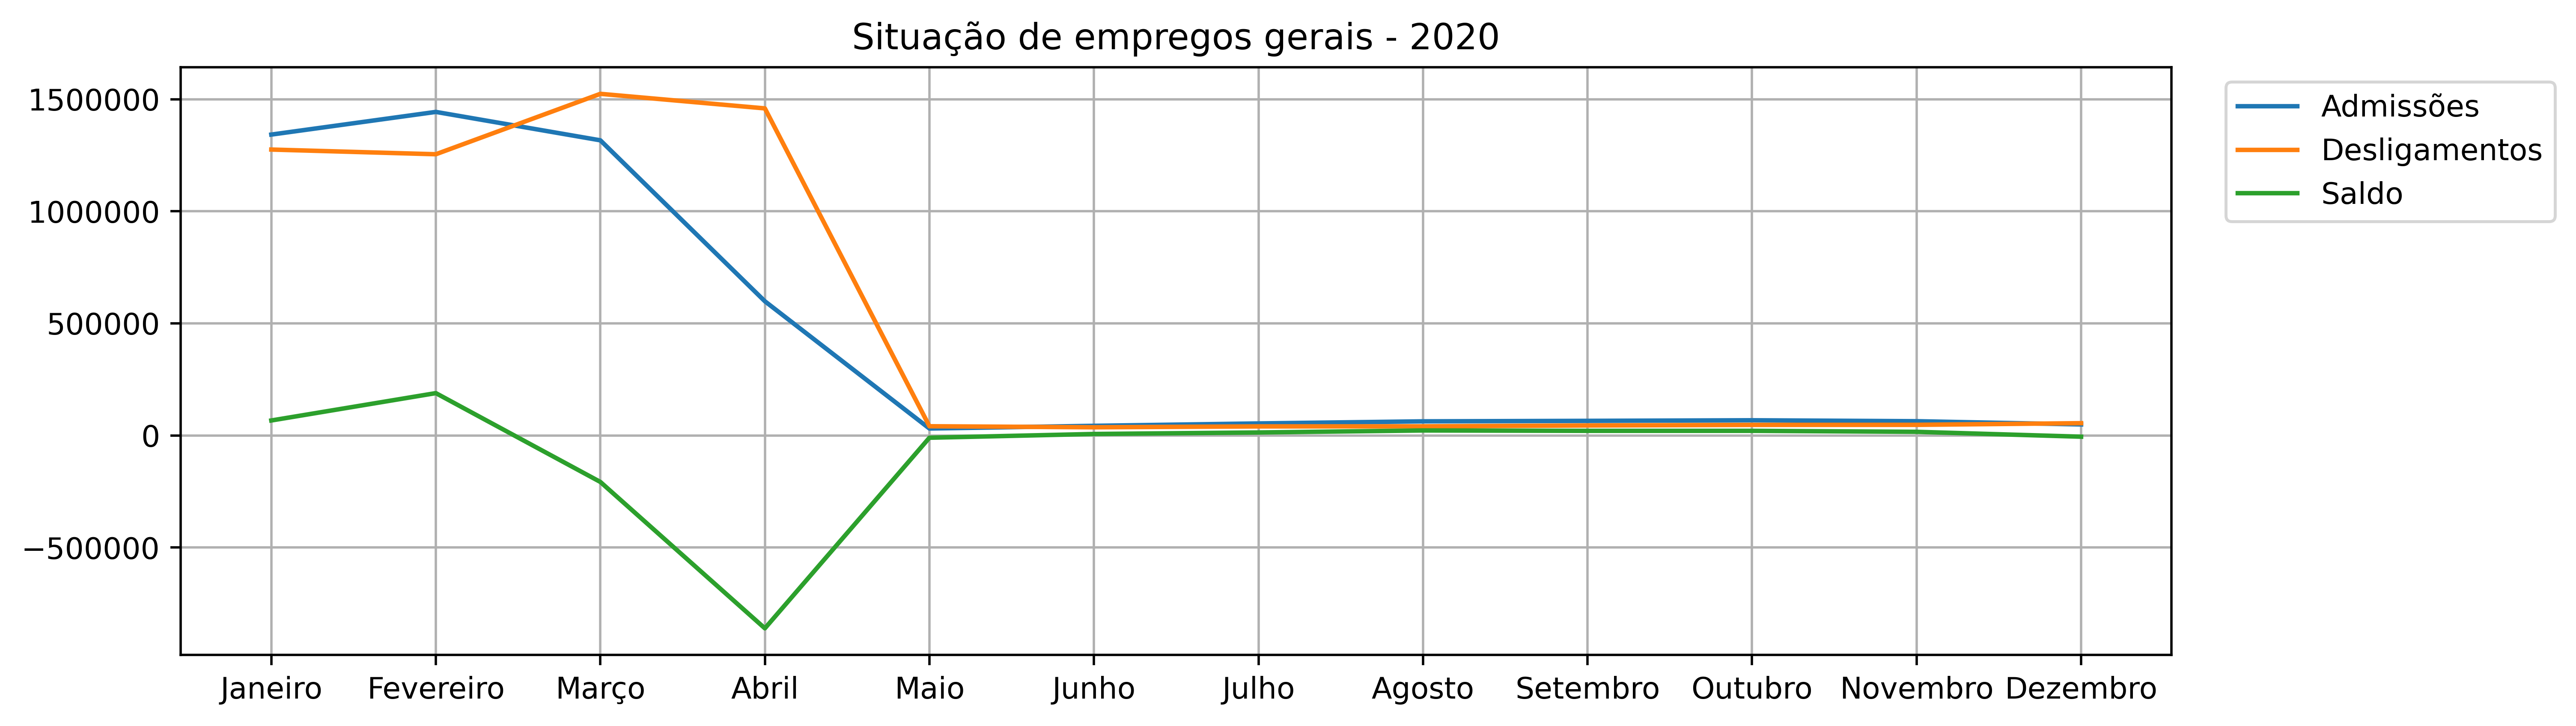

In [7]:
dadosParaExibir = {
    "admissoes": "Admissões",
    "desligamentos": "Desligamentos",
    "saldo": "Saldo"
}

plotarGrafico(dadosFiltrados2020, "Situação de empregos gerais - 2020", dadosParaExibir, (12, 8))

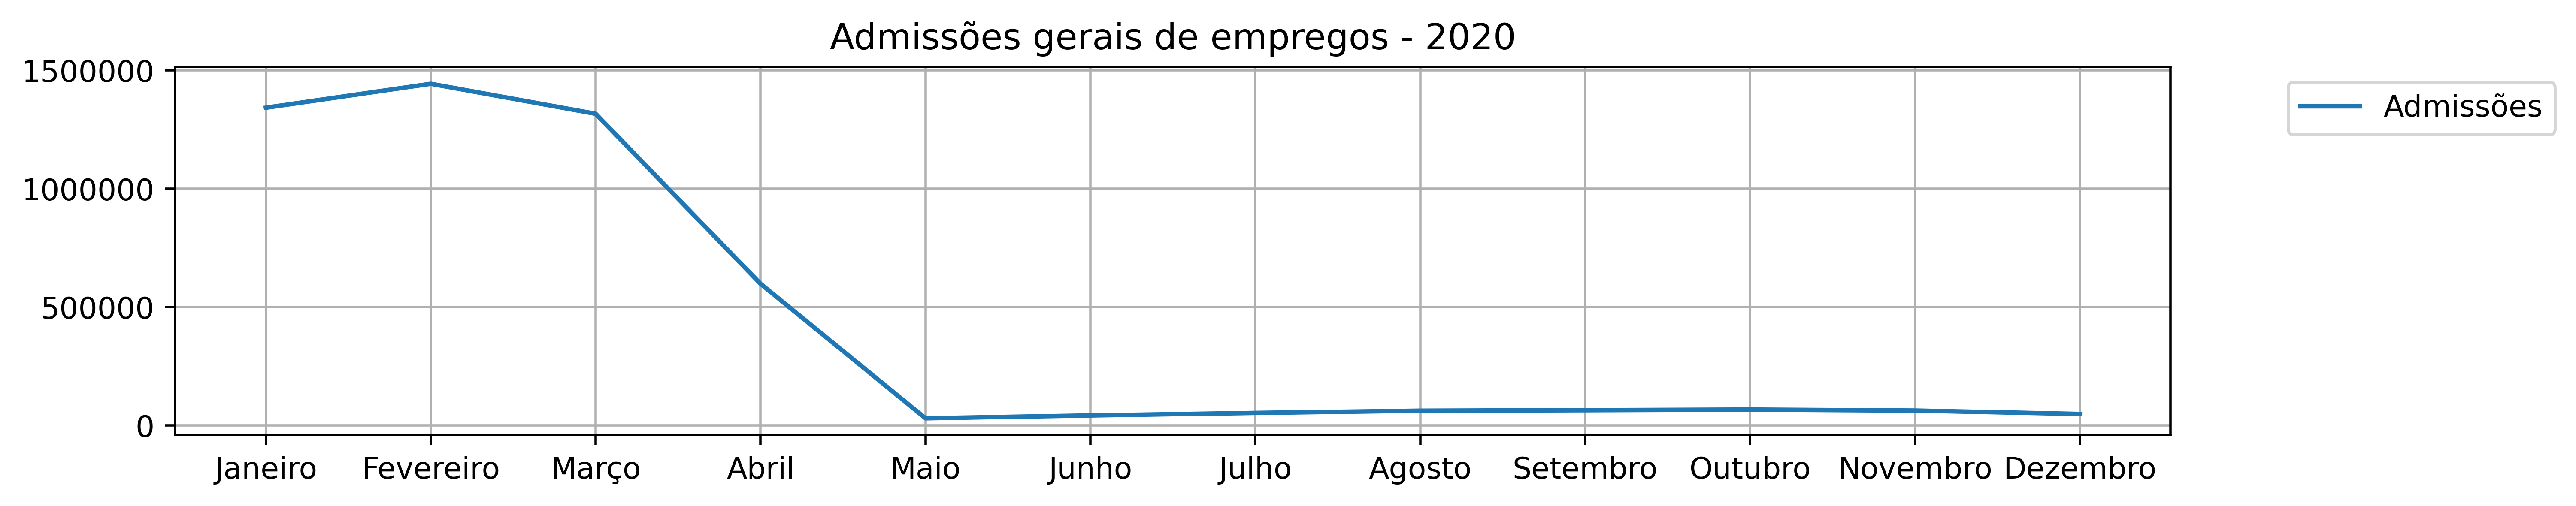

In [8]:
dadosParaExibir = {
    "admissoes": "Admissões",
}

plotarGrafico(dadosFiltrados2020, "Admissões gerais de empregos - 2020", dadosParaExibir, (12, 5))

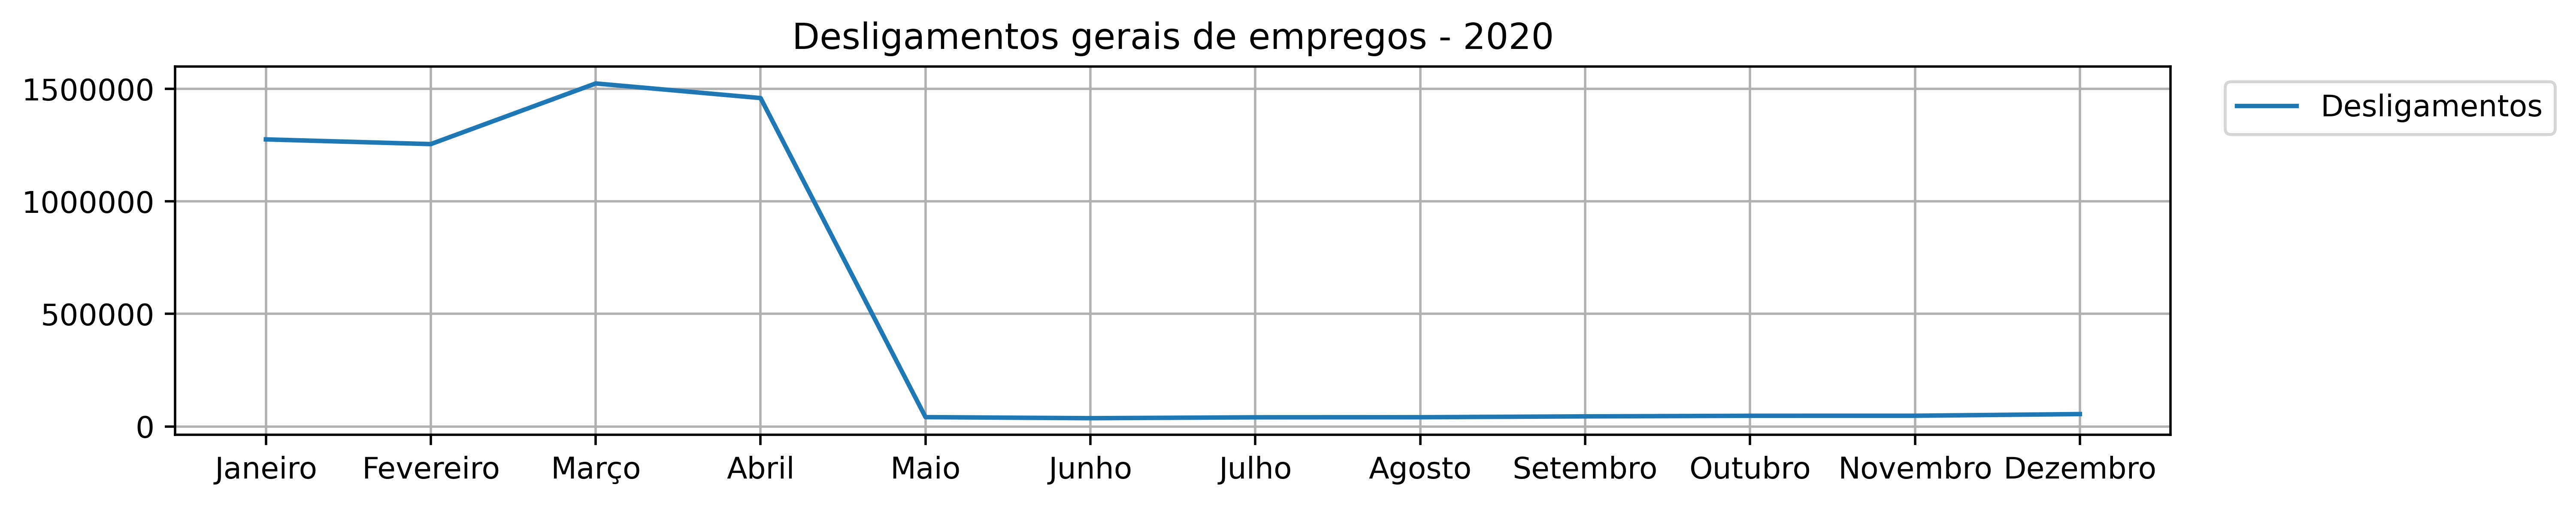

In [9]:
dadosParaExibir = {
    "desligamentos": "Desligamentos",
}

plotarGrafico(dadosFiltrados2020, "Desligamentos gerais de empregos - 2020", dadosParaExibir, (12, 5))

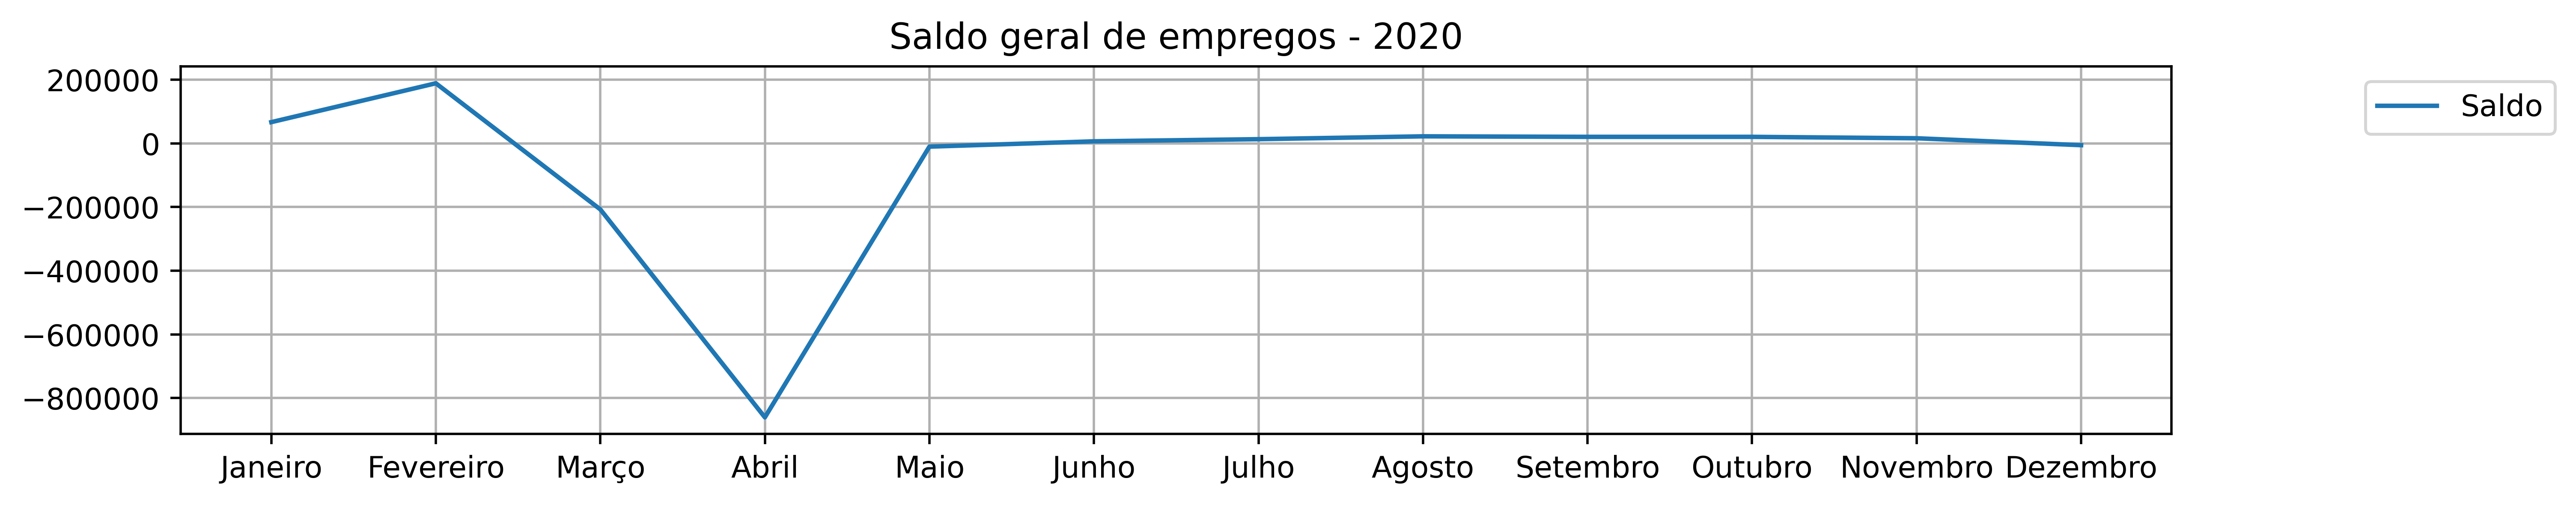

In [10]:
dadosParaExibir = {
    "saldo": "Saldo"
}

plotarGrafico(dadosFiltrados2020, "Saldo geral de empregos - 2020", dadosParaExibir, (12, 5))

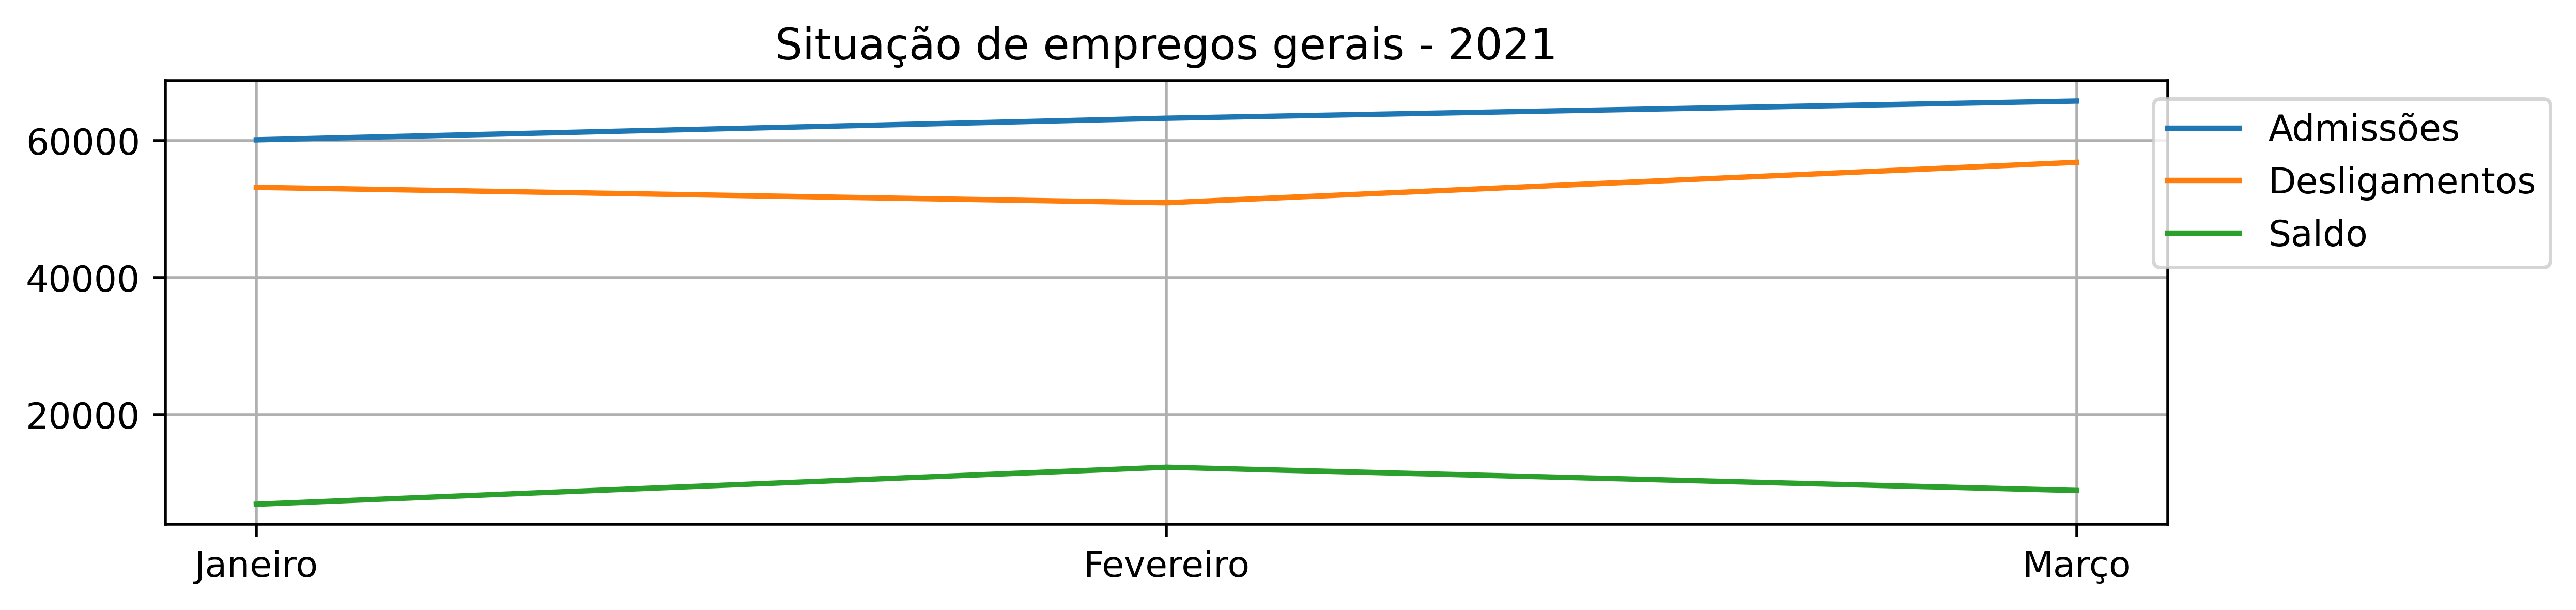

In [11]:
dadosParaExibir = {
    "admissoes": "Admissões",
    "desligamentos": "Desligamentos",
    "saldo": "Saldo"
}

plotarGrafico(dadosFiltrados2021, "Situação de empregos gerais - 2021", dadosParaExibir, (10, 5))

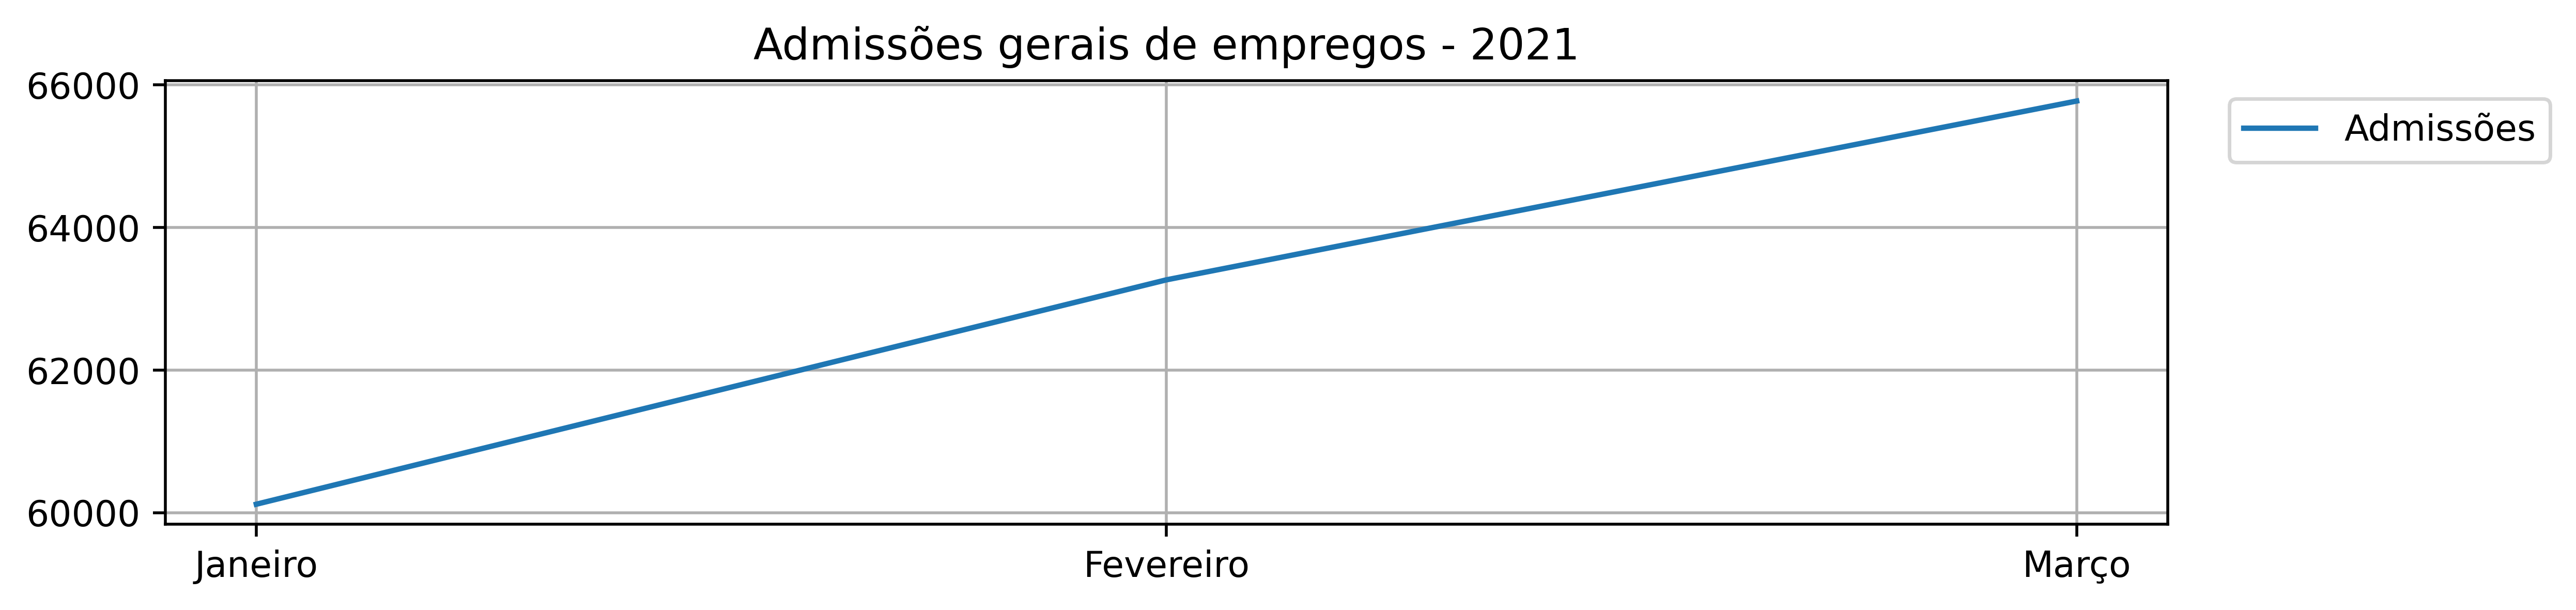

In [12]:
dadosParaExibir = {
    "admissoes": "Admissões",
}

plotarGrafico(dadosFiltrados2021, "Admissões gerais de empregos - 2021", dadosParaExibir, (10, 5))

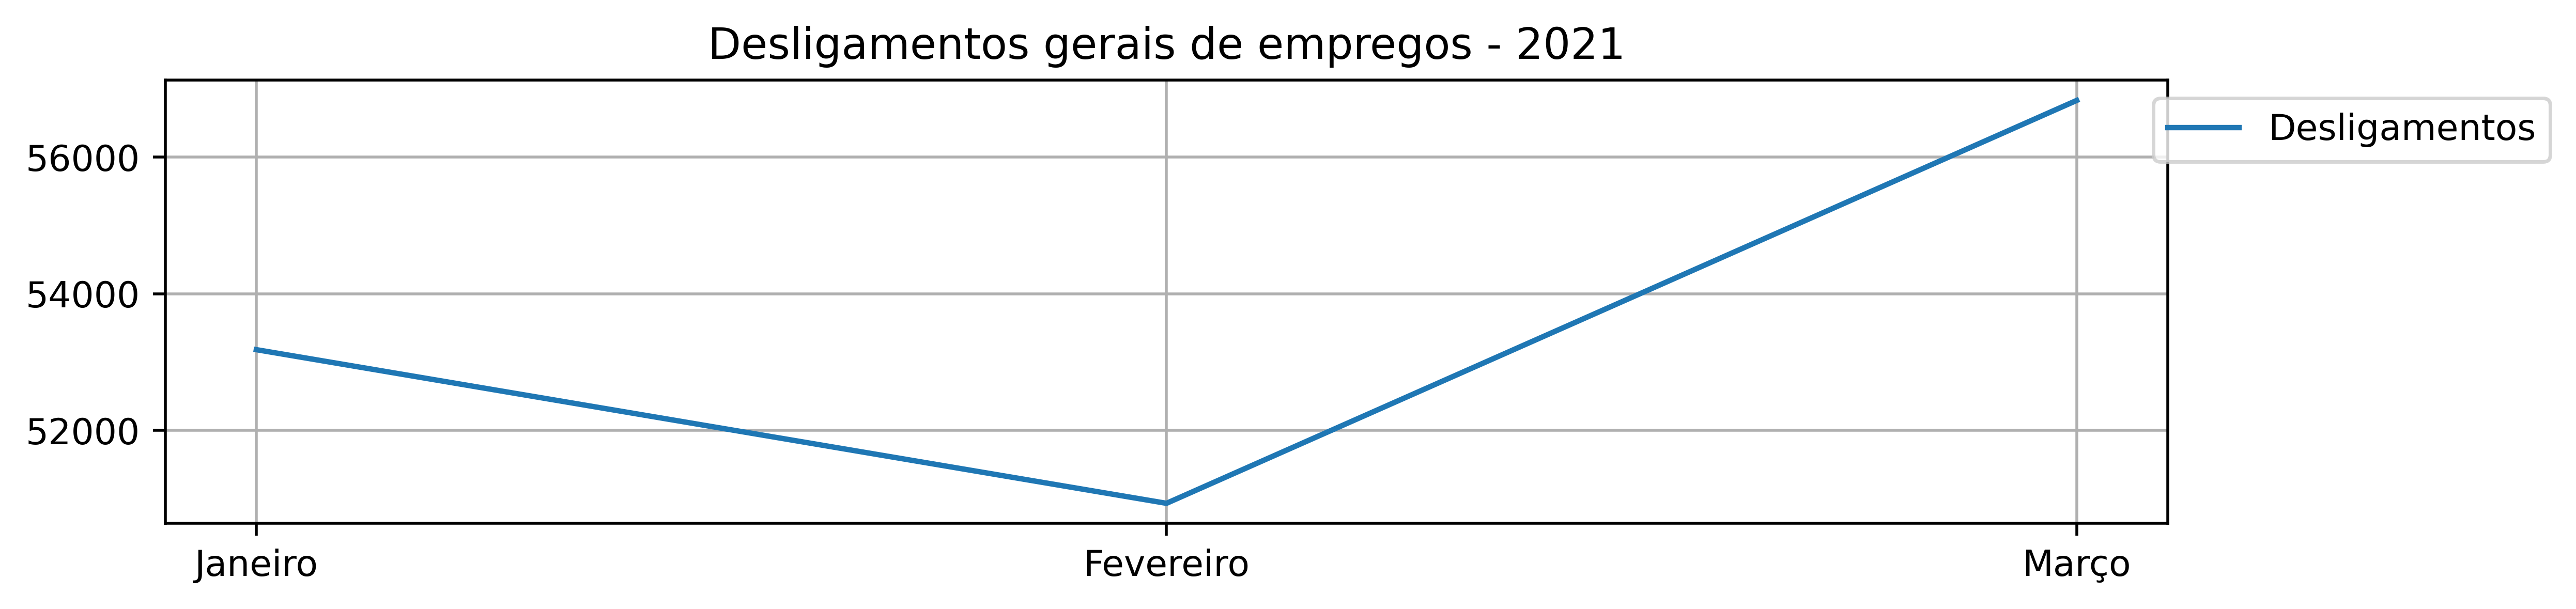

In [13]:
dadosParaExibir = {
    "desligamentos": "Desligamentos",
}

plotarGrafico(dadosFiltrados2021, "Desligamentos gerais de empregos - 2021", dadosParaExibir, (10, 5))

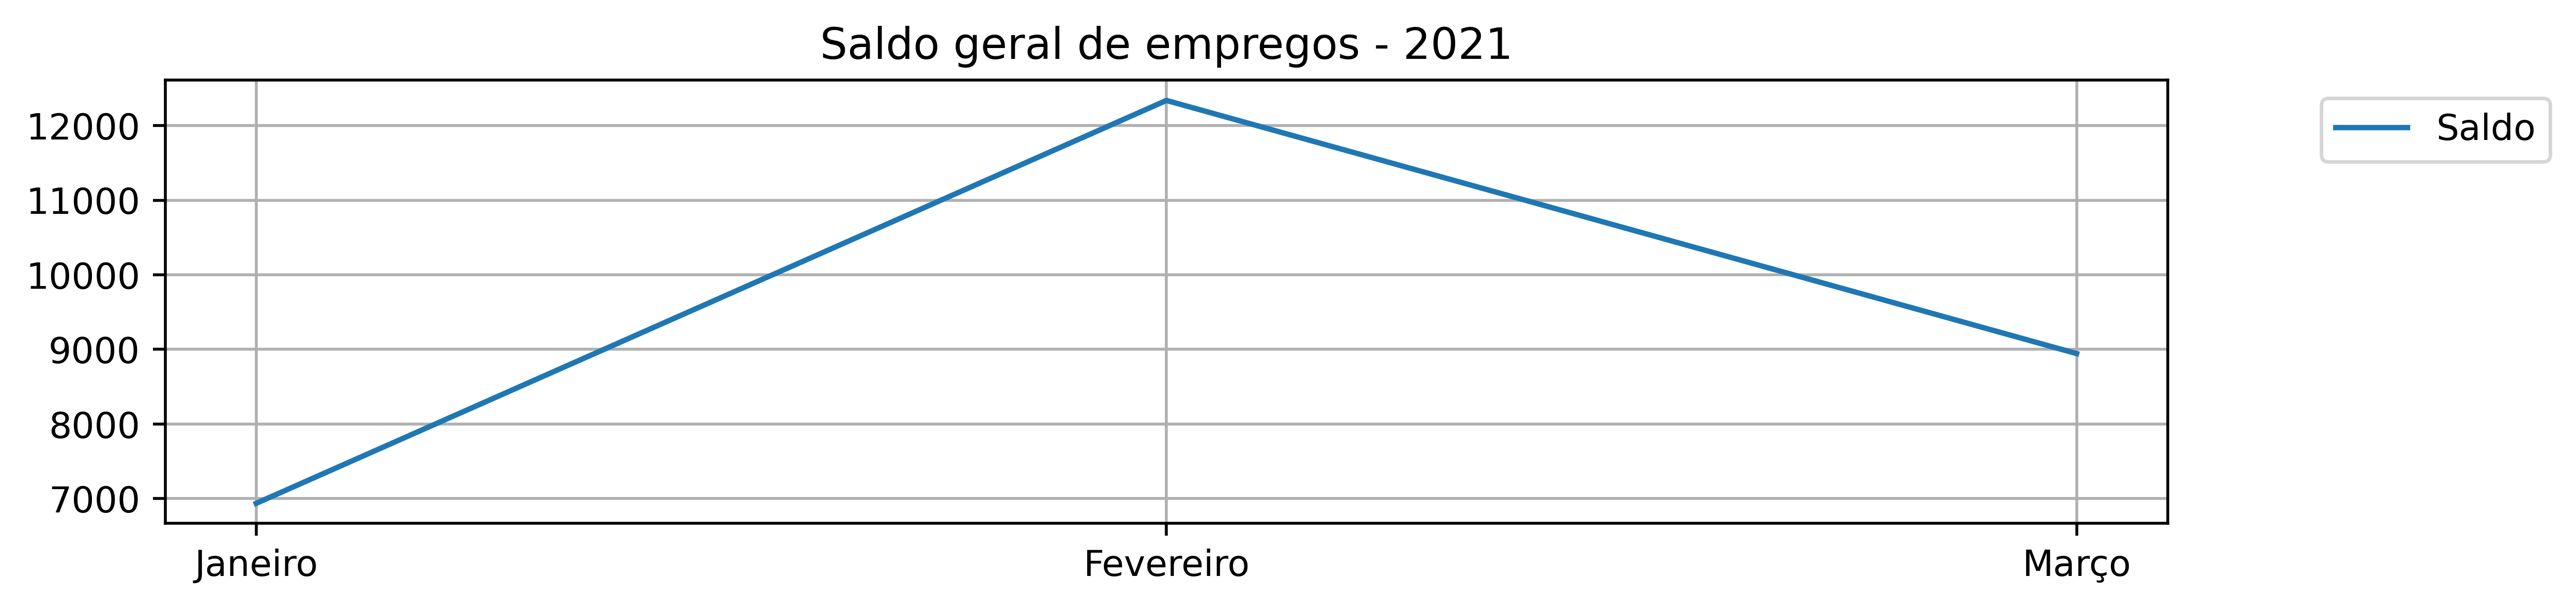

In [14]:
dadosParaExibir = {
    "saldo": "Saldo",
}

plotarGrafico(dadosFiltrados2021, "Saldo geral de empregos - 2021", dadosParaExibir, (10, 5))